## Import Libraries

In [473]:
import pandas as pd
import re
from cm_api import *
from cm_config import token
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from decimal import *

In [63]:
#get refresh token
rt = token['refresh_token']

In [64]:
#get api token
api_token = get_api_token(rt)

## Find Chartmetric ID for Dreams by Fleetwood Mac
Since we know that the 2004 Remastered version was the one used in the tiktok video, we need to
get the ID associated with that specific track

In [4]:
#use search function form cm_api to find chartmetric id for Dreams
dreams = search(api_token, 'Dreams', 'Fleetwood Mac', limit=100)

isrc #:  USWB11301111
track name :  Dreams - 2004 Remastered Edition
chartmetric ID :  16026997
artist name :  Fleetwood Mac
album name :  Rumours (Super Deluxe)
release date :  1977-02-04T00:00:00.000Z


isrc #:  USWB19900178
track name :  Dreams
chartmetric ID :  16032762
artist name :  Fleetwood Mac
album name :  Greatest Hits
release date :  1988-11-21T00:00:00.000Z


isrc #:  USWB10400046
track name :  Dreams
chartmetric ID :  16016833
artist name :  Fleetwood Mac
album name :  Rumours
release date :  1977-02-04T00:00:00.000Z




In [5]:
#save dataframe as csv file
dreams.to_csv('data/dreams_info.csv', index_label='index')

In [ ]:
dreams

In [6]:
#let's grab the chartmetric id associated with the 2004 remastered version and save as a variable
dreams2004rem_cmid = dreams.loc[dreams['track'] == 'Dreams - 2004 Remastered Edition']['chartmetric id'][0]
dreamsgreatesthits_cmid = dreams.loc[dreams['track'] == 'Dreams']['chartmetric id'][1]
dreamsrumours_cmid = dreams.loc[dreams['track'] == 'Dreams']['chartmetric id'][2]

## Collect Historical Data On Spotify Playlist Positions

Playlist activity is a good indicator of how popular a particular track is. Features such as number of followers, official or not, and track position within a particular playlist can tell you alot about how large its reach is. The description of a playlist can also suggest the mood/vibe the author had in mind when deciding whether or not they should at the track

### Dreams (2004 Remaster)

In [20]:
data = get_track_playlist(api_token, dreams2004rem_cmid, 'spotify', 'current', '2020-09-01', 100)

In [61]:
#take a look at availavle data features
data[1]['playlist'].keys()

dict_keys(['playlist_id', 'track_id', 'position', 'added_at', 'period', 'id', 'name', 'description', 'image_url', 'sys_last_updated', 'last_updated', 'personalized', 'code2', 'owner_name', 'owner_id', 'user_id', 'official', 'tags', 'followers', 'num_track', 'fdiff_week', 'fdiff_month', 'catalog', 'active_ratio'])

In [79]:
data[5]['playlist']

{'playlist_id': '3IBrsav3Sh8AImtaGoaP07',
 'track_id': 66204,
 'position': 20,
 'added_at': '2020-10-06T00:00:00.000Z',
 'period': 1,
 'id': 1880171,
 'name': 'Good Mornings - Happily Positive Music to Start The Day',
 'description': 'Good morning music to wake up happy and start your day right! We’ve put together the perfect playlist of upbeat pop classics and positive songs to carry your stress away and start with a smile - <a href="https://rb.gy/hbsqjf">Submit Your Music</a>',
 'image_url': 'https://i.scdn.co/image/ab67706c0000bebb721f9cf1078e59cbf457989e',
 'sys_last_updated': '2020-10-07T00:32:05.919Z',
 'last_updated': '2020-10-07T00:32:05.848Z',
 'personalized': False,
 'code2': None,
 'owner_name': 'Chilled Mumoro',
 'owner_id': 269820,
 'user_id': '2k995mbzd5f9ui49qh23xp2tr',
 'official': False,
 'tags': [{'id': 188, 'name': 'pop'}, {'id': 9544, 'name': 'folk-pop'}],
 'followers': 25569,
 'num_track': '688',
 'fdiff_week': 920,
 'fdiff_month': 4780,
 'catalog': 'catalogue ',
 

In [122]:
#parse metadata for Dreams 2004 Remaster playlist postions from 100 spotify playlists

data_bucket = []
for playlist in data:
    playlist_tuple = (playlist['playlist']['playlist_id'],playlist['playlist']['name'], playlist['playlist']['position'], 
                      playlist['playlist']['added_at'], playlist['playlist']['description'], 
                      playlist['playlist']['official'],playlist['playlist']['followers'])
    data_bucket.append(playlist_tuple)
    
playlists_dreamsrem = pd.DataFrame(data_bucket, columns=['playlist id', 'playlist name', 'positon', 'add date', 'description', 'official', 'followers'])

playlists_dreamsrem.to_csv('data/dreamsremas_spotplayl.csv', index='playlist id')


#### Load DataFrame

In [11]:
playlists_dreamsrem = pd.read_csv('data/dreamsremas_spotplayl.csv', index_col=0)
playlists_dreamsrem

,playlist id,playlist name,positon,add date,description,official,followers
0,1nNFsrIJJOoKIH3Pmv9UGv,||THE HIGH TRIP||,156,2020-10-07T00:00:00.000Z,The chillest and trippy music to listen to whi...,False,1535
1,2w0bNnq8GVaheTEphPxSwv,Ostseewelle Hit-Radio Top 100,6,2020-10-07T00:00:00.000Z,Die Hits von Ostseewelle aus Rostock. Die 100 ...,False,947
2,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,50,2020-10-07T00:00:00.000Z,Your daily update of the most played tracks ri...,True,15636657
3,6ayPoVa6NGpiU4gwZeA7kK,Capital FM Playlist 🔊 Top 40 UK,22,2020-10-06T00:00:00.000Z,95-106 Capital FM - Big Top 40 - UK Radio Hits,False,1425
4,3t8srEYVVgNI2b1Jx8MREC,Top 50 Ireland,44,2020-10-06T00:00:00.000Z,Top 50 Ireland. The Top 50 tracks in Ireland r...,False,2056
...,...,...,...,...,...,...,...
95,6Yn3GrP6D6dOSfKFfpzAiC,Yeah Yeah Yeah - The Story of Modern Pop,1941,2020-09-16T00:00:00.000Z,Bob Stanley&#x27;s fantastic tour through the ...,False,1119
96,5I9vL0IiWzI9dThpdW3hbP,"Oldies, Rock n' Roll, Motown and Soul (50's, 6...",559,2020-09-08T00:00:00.000Z,NaN,False,1816
97,7y15TCWmOoqxeYyiALg775,Old but gold 💛,837,2020-09-06T00:00:00.000Z,NaN,False,47675
98,0WvTLRAGBHjTMj70Xrrby3,All Out Legacy,292,2020-09-05T00:00:00.000Z,From the birth of Rock ’n’ Roll to hippies and...,False,29507


#### Convert pandas series object to datetime

In [23]:
#convert datetime series to just year-month-day format
playlists_dreamsrem['add date'] = pd.to_datetime(playlists_dreamsrem['add date'])
playlists_dreamsrem['add date'] = playlists_dreamsrem['add date'].dt.date

In [24]:
playlists_dreamsrem['add date']

0     2020-10-07
1     2020-10-07
2     2020-10-07
3     2020-10-06
4     2020-10-06
         ...    
95    2020-09-16
96    2020-09-08
97    2020-09-06
98    2020-09-05
99    2020-09-05
Name: add date, Length: 100, dtype: object

#### Visualize Playlist Add Trend

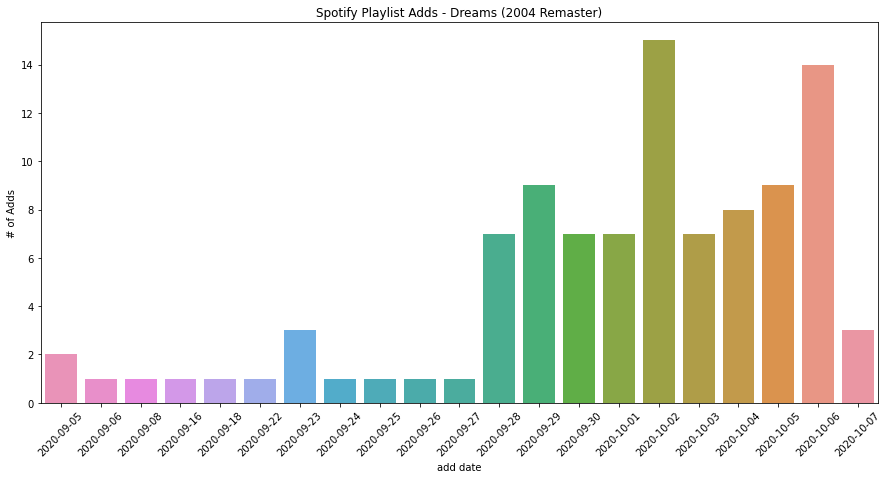

In [28]:
#Let's visualize how many times the track was added to playlists
plot=sns.countplot(x=playlists_dreamsrem['add date'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plt.title("Spotify Playlist Adds - Dreams (2004 Remaster)")
plt.ylabel("# of Adds")
plot.invert_xaxis()
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.savefig('images/spotify_playlistadds_dreamsrmstr.png')

### Save Dataframe with converted Datetime Series

In [29]:
playlists_dreamsrem.to_csv('data/dreamsremas_spotplayl.csv', index='playlist id')

In [38]:
#open dreams rmstr df

# dreamsrmstr_spotpl = pd.read_csv('data/dreamsremas_spotplayl.csv', index_col=0)
# dreamsrmstr_spotpl

### Dreams (Greatest Hits Album)

In [65]:
dreams_greatesthits = get_track_playlist(api_token, dreamsgreatesthits_cmid, 'spotify', 'current', '2020-09-01', 100)

In [67]:
#parse metadata for Dreams (Greatest Hits album version) playlist postions from 100 spotify playlists

data_bucket = []
for playlist in dreams_greatesthits:
    playlist_tuple = (playlist['playlist']['playlist_id'],playlist['playlist']['name'], playlist['playlist']['position'], 
                      playlist['playlist']['added_at'], playlist['playlist']['description'], 
                      playlist['playlist']['official'],playlist['playlist']['followers'])
    data_bucket.append(playlist_tuple)
    
playlists_dreamsgreatesthits = pd.DataFrame(data_bucket, columns=['playlist id', 'playlist name', 'positon', 'add date', 'description', 'official', 'followers'])

playlists_dreamsgreatesthits.to_csv('data/dreamsgreatesthits_spotplayl.csv', index='playlist id')
playlists_dreamsgreatesthits

,playlist id,playlist name,positon,add date,description,official,followers
0,61bnhKFoLANPMxlxgQ3hAM,8.1,121,2020-10-07T00:00:00.000Z,,False,25
1,1srEFACcg6Fs0IeDnCkayK,Brian FM,1624,2020-10-07T00:00:00.000Z,Adult Hits,False,1440
2,6ZpWruVslJK4S2WTZpTYiu,"CARTE BLANCHE CLASSICS - credible en plat, van...",1740,2020-10-07T00:00:00.000Z,,False,26
3,2wDWKCwq63l4ggk3pdiLHc,MATHERFACKER,508,2020-10-07T00:00:00.000Z,,False,33
4,5M3lqf1pE2fodXFThdKJu6,No More rnb,249,2020-10-06T00:00:00.000Z,,False,4
...,...,...,...,...,...,...,...
95,0WA0gmevwPkbGioseFxsnE,FluffedMojo,798,2020-09-15T00:00:00.000Z,All of it.,False,4
96,6V1Nfi4cLEYdOrs1R7AzrM,Bruneaux's Favorite Songs of All-Time,997,2020-09-10T00:00:00.000Z,,False,51
97,74avQSetPDwWZptTsTj2eP,Get Motivated Playlist,1845,2020-09-09T00:00:00.000Z,"<a href=""http://www.strayer.edu/?mcv=DG82""> Cl...",False,353
98,0Xi527A8PH30qJzvc2XWcX,"70's, 80's, 90's Super Hits",474,2020-09-07T00:00:00.000Z,,False,123


#### Load Dataframe


In [33]:
playlists_dreamsgreatesthits = pd.read_csv('data/dreamsgreatesthits_spotplayl.csv', index_col=0)
# playlists_dreamsgreatesthits

#### Convert pandas series object to datetime

In [35]:
#convert fatetime series to just year-month-day format
playlists_dreamsgreatesthits['add date'] = pd.to_datetime(playlists_dreamsgreatesthits['add date'])
playlists_dreamsgreatesthits['add date'] = playlists_dreamsgreatesthits['add date'].dt.date
# playlists_dreamsgreatesthits['add date']

#### Visualize Playlist Add Trend

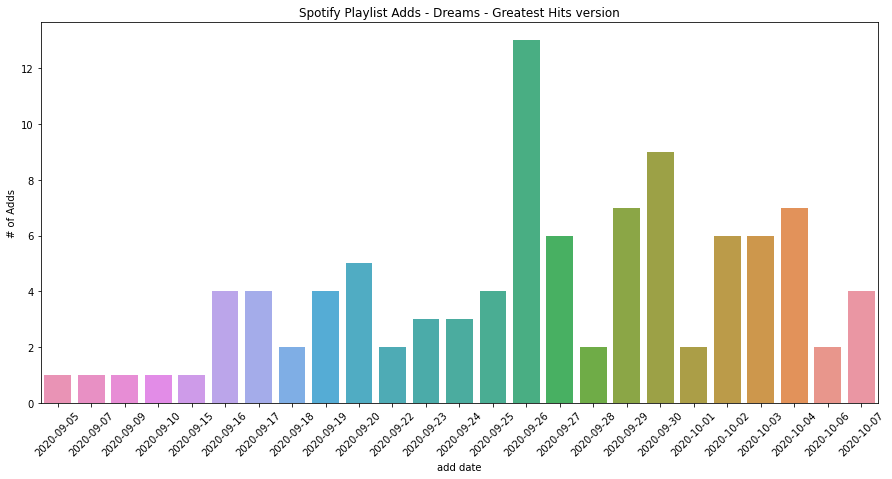

In [37]:
#Let's visualize how many times the track was added to playlists
plot=sns.countplot(x=playlists_dreamsgreatesthits['add date'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plt.title("Spotify Playlist Adds - Dreams - Greatest Hits version")
plt.ylabel("# of Adds")
plot.invert_xaxis()
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.savefig('images/spotify_playlistadds_dreamsgrreatesthits.png')

In [39]:
playlists_dreamsgreatesthits.to_csv('data/dreamsgreatesthits_spotplayl.csv', index='playlist id')

### Dreams (Rumours Album)

In [68]:
dreams_rumours = get_track_playlist(api_token, dreamsrumours_cmid, 'spotify', 'current', '2020-09-01', 100)

In [69]:
#parse metadata for Dreams (Greatest Hits album version) playlist postions from 100 spotify playlists

data_bucket = []
for playlist in dreams_rumours:
    playlist_tuple = (playlist['playlist']['playlist_id'],playlist['playlist']['name'], playlist['playlist']['position'], 
                      playlist['playlist']['added_at'], playlist['playlist']['description'], 
                      playlist['playlist']['official'],playlist['playlist']['followers'])
    data_bucket.append(playlist_tuple)
    
playlists_rumours = pd.DataFrame(data_bucket, columns=['playlist id', 'playlist name', 'positon', 'add date', 'description', 'official', 'followers'])

playlists_rumours.to_csv('data/rumours_spotplayl.csv', index='playlist id')
playlists_rumours

,playlist id,playlist name,positon,add date,description,official,followers


Looks like there's no record of any playlists adding the Rumours version of Dreams, so let's not worry about that.

### Total Daily Playlist Adds

In [272]:
playlists_dreamsgreatesthits = pd.read_csv('data/dreamsgreatesthits_spotplayl.csv', index_col=0)
dreamsrmstr_spotpl = pd.read_csv('data/dreamsremas_spotplayl.csv', index_col=0)

In [317]:
#convert the lists to series and get the counts
d1 = pd.Series(dreamsrmstr_spotpl['add date'].value_counts())

d2 = pd.Series(playlists_dreamsgreatesthits['add date'].value_counts())

# #get the counts as a dataframe
df=pd.concat([d1,d2],axis=1)
df.columns=['Dreams 2004 Remaster','Dreams Greatest Hits']

# # # # melt the data frame so it has a "tidy" data format
df = df.reset_index().melt(id_vars=['index'])
df.columns=['date', 'track name', '# of Playlist Adds']

# #Fill NaN values with 0
df['# of Playlist Adds'] = df['# of Playlist Adds'].fillna(0)

# #sort dateframe by date
df.sort_values('date', inplace=True)

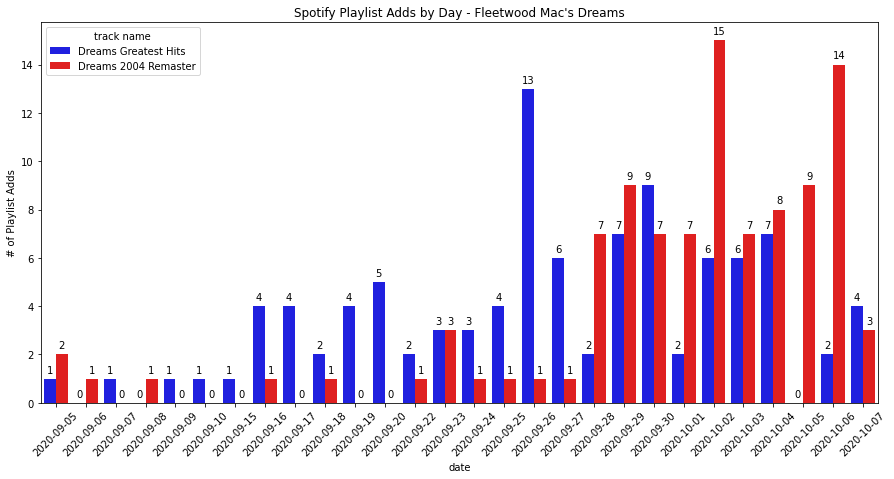

In [318]:
#plot a bar graph and assign track name variable to hue
double_plot = sns.barplot(
    x='date',
    y='# of Playlist Adds',
    hue='track name',
    data=df,
    palette=['blue','red'],
    alpha=1,
    dodge=True,
)

for item in double_plot.get_xticklabels():
    item.set_rotation(45)
    

for p in double_plot.patches:
    double_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Spotify Playlist Adds by Day - Fleetwood Mac's Dreams")
plt.savefig('images/spotify_playlistadds_bothdreams.png')

###  Total Daily Playlist Reach

In [474]:
playlists_dreamsgreatesthits = pd.read_csv('data/dreamsgreatesthits_spotplayl.csv', index_col=0)
dreamsrmstr_spotpl = pd.read_csv('data/dreamsremas_spotplayl.csv', index_col=0)

In [475]:
#convert the lists to series and get the counts
d1 = dreamsrmstr_spotpl.groupby('add date')['followers'].sum()

d2 = playlists_dreamsgreatesthits.groupby('add date')['followers'].sum()

# #get the counts as a dataframe
df=pd.concat([d1,d2],axis=1)
df.columns=['Dreams 2004 Remaster','Dreams Greatest Hits']

# # # # melt the data frame so it has a "tidy" data format
df = df.reset_index().melt(id_vars='index')
df.columns=['date', 'track name', 'total reach']

# #Fill NaN values with 0
df['total reach'] = df['total reach'].fillna(0)

# #sort dateframe by date
df.sort_values('date', inplace=True)

Text(0.5, 1.0, "Total Followers (Daily Reach) - Fleetwood Mac's Dreams")

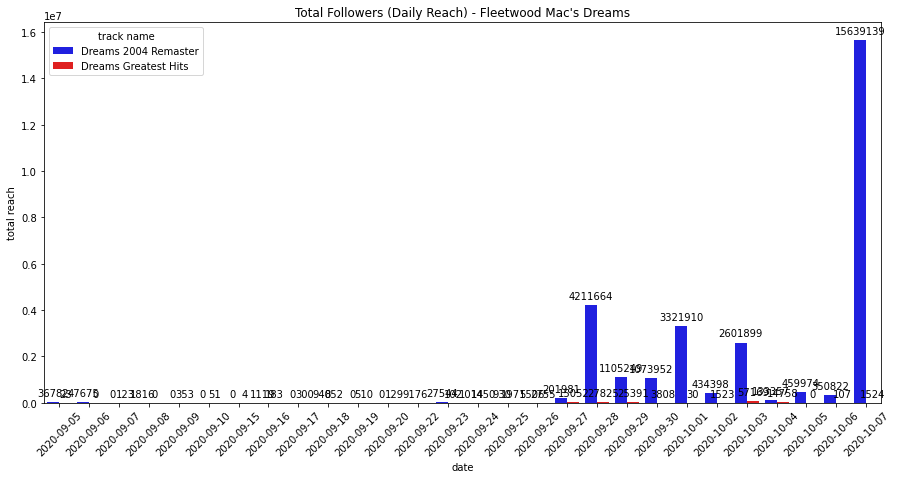

In [476]:
#plot a bar graph and assign track name variable to hue
double_plot = sns.barplot(
    x='date',
    y='total reach',
    hue='track name',
    data=df,
    palette=['blue','red'],
    alpha=1,
    dodge=True,
)

for item in double_plot.get_xticklabels():
    item.set_rotation(45)
    

for p in double_plot.patches:
    double_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Total Followers (Daily Reach) - Fleetwood Mac's Dreams")
# plt.savefig('images/spotify_playlistadds_bothdreams.png')

Clearly, the remastered track had a significantly larger reach than the greatest hits version.

In [477]:
df = df.replace(0.0, np.nan)
df = df.dropna(how='all', axis=0)
df.dropna(inplace=True)

In [478]:
dflog = df.copy()

In [479]:
dflog['total reach - log(x)'] = dflog['total reach'].apply(lambda x: np.log(x))

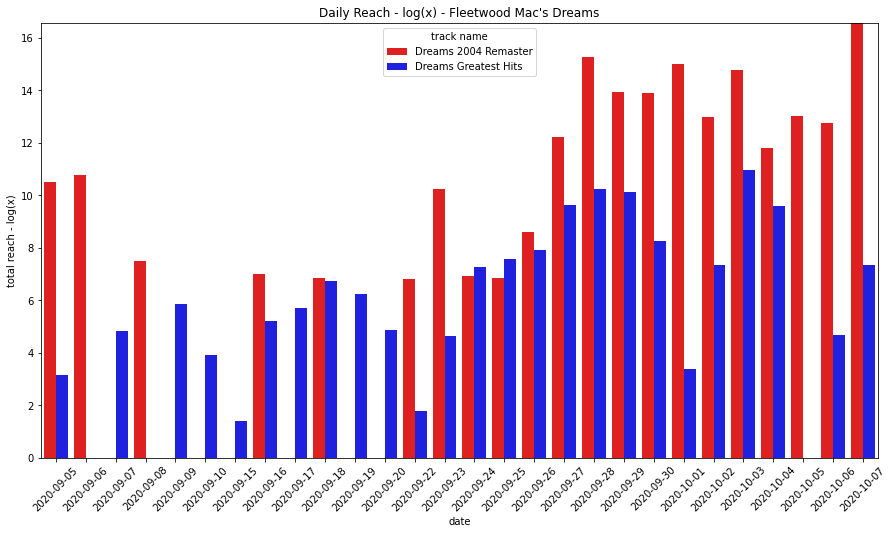

In [485]:
#plot a bar graph and assign track name variable to hue
double_plot = sns.barplot(
    x='date',
    y='total reach - log(x)',
    hue='track name',
    data=dflog,
    palette=['red', 'blue'],
    alpha=1,
    dodge=True,
)
double_plot.set_ylim(0,dflog['total reach - log(x)'].max())

for item in double_plot.get_xticklabels():
    item.set_rotation(45)
    
# reach_values = list(dflog['total reach'])
# i = 0
# for p in double_plot.patches:
# #     if p.get_height() == True:
#     val = Decimal(reach_values[i]).normalize()
#     if reach_values[i] != reach_values[-1]:
#         continue
 
#     i+=1
#     double_plot.annotate(val, 
#         (p.get_x() + p.get_width() / 2.,p.get_height()), 
#                ha = 'center', va = 'center', 
#                xytext = (0, 15), 
#                textcoords = 'offset points',
#                 )
#     val = Decimal(reach_values[i]).normalize()
#     print(val)
#     i+=1

    

    

fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title("Daily Reach - log(x) - Fleetwood Mac's Dreams")
plt.savefig('images/spotify_dailyreachlog_bothdreams.png')

### Statistical Analysis

In [157]:
#calculate the median # of playlist adds per day before and after original post
pre_viral_post = df.loc[df['date'] < '2020-09-25']
post_viral_post = df.loc[df['date'] >= '2020-09-25']

print("Median Playlist Adds per Day before: ", pre_viral_post['# of Playlist Adds'].median())
print("Median Playlist Adds per Day after: ", post_viral_post['# of Playlist Adds'].median())

Median Playlist Adds per Day before:  1.0
Median Playlist Adds per Day after:  6.5
